# Scraping the Web

In [43]:
#Importing required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
#Assigning details
url = "https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"

# Create a request object
response = requests.get(url)

In [3]:
# Check for successful response
response.status_code

200

In [4]:
s = response.text
len(s)

144099

In [5]:
s[:1000]

'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.e82689.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple-touch-icon" siz

In [6]:
# Save the entire HTML content to a file named 'webpage.html'
with open('webpage.html','w',encoding='utf-8') as f:
    f.write(s)

In [7]:
# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

In [8]:
selection_class = "_4rR01T"

model_tags = soup.find_all('div',{'class':selection_class})

In [9]:
model_tags[0].text

'POCO C51 (Royal Blue, 64 GB)'

In [10]:
model = []
for tag in model_tags:
    model.append(tag.text)
model
len(model)

24

In [11]:
#<div class="_30jeq3 _1_WHN1">₹11,999</div>
selection_class = "_30jeq3 _1_WHN1"

price_tag = soup.find_all('div',{'class':selection_class})

In [12]:
price = []
for tag in price_tag:
    price.append(tag.text)
price

['₹5,499',
 '₹11,999',
 '₹10,999',
 '₹4,999',
 '₹12,999',
 '₹11,999',
 '₹11,999',
 '₹12,999',
 '₹12,999',
 '₹14,999',
 '₹14,999',
 '₹14,999',
 '₹11,999',
 '₹13,999',
 '₹10,999',
 '₹13,999',
 '₹15,999',
 '₹9,999',
 '₹26,999',
 '₹26,999',
 '₹25,999',
 '₹25,999',
 '₹10,499',
 '₹15,999']

In [13]:
#Searching data
selection_class = "_1xgFaf"

storage_tags = soup.find_all('ul',{'class':selection_class})

In [14]:
#Collecting webscrape parsed data in list
details = []
for tag in storage_tags:
    ul_text_lines = tag.get_text(separator='\n').splitlines()

    # Remove empty lines from the result
    ul_text_lines = list(filter(None, ul_text_lines))

    details.append(ul_text_lines)
len(details)

24

In [15]:
#Storing all collected data
for i in range(len(model)):
    details[i].insert(0,(model[i]))
    
    details[i].insert(1,price[i])
    
details

[['POCO C51 (Royal Blue, 64 GB)',
  '₹5,499',
  '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
  '16.56 cm (6.52 inch) HD+ Display',
  '8MP Dual Rear Camera | 5MP Front Camera',
  '5000 mAh Battery',
  'Helio G36 Processor',
  '1 Year Manufacturer Warranty for Phone and 6 Months Warranty for in the Box Accessories'],
 ['Motorola G34 5G (Ocean Green, 128 GB)',
  '₹11,999',
  '8 GB RAM | 128 GB ROM',
  '16.51 cm (6.5 inch) HD+ Display',
  '50MP + 2MP | 16MP Front Camera',
  '5000 mAh Battery',
  'Snapdragon 695 5G Processor',
  'Vegan Leather Design',
  '1 Year on Handset and 6 Months on Accessories'],
 ['Motorola G34 5G (Ocean Green, 128 GB)',
  '₹10,999',
  '4 GB RAM | 128 GB ROM',
  '16.51 cm (6.5 inch) HD+ Display',
  '50MP + 2MP | 16MP Front Camera',
  '5000 mAh Battery',
  'Snapdragon 695 5G Processor',
  'Vegan Leather Design',
  '1 Year on Handset and 6 Months on Accessories'],
 ['POCO C51 - Locked with Airtel Prepaid (Royal Blue, 64 GB)',
  '₹4,999',
  '4 GB RAM | 64 GB ROM | Ex

In [16]:
df = pd.DataFrame(details)
df

,0,1,2,3,4,5,6,7,8
0,"POCO C51 (Royal Blue, 64 GB)","₹5,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Helio G36 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,None
1,"Motorola G34 5G (Ocean Green, 128 GB)","₹11,999",8 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ Display,50MP + 2MP | 16MP Front Camera,5000 mAh Battery,Snapdragon 695 5G Processor,Vegan Leather Design,1 Year on Handset and 6 Months on Accessories
2,"Motorola G34 5G (Ocean Green, 128 GB)","₹10,999",4 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ Display,50MP + 2MP | 16MP Front Camera,5000 mAh Battery,Snapdragon 695 5G Processor,Vegan Leather Design,1 Year on Handset and 6 Months on Accessories
3,POCO C51 - Locked with Airtel Prepaid (Royal B...,"₹4,999",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Helio G36 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,None
4,"vivo T2x 5G (Aurora Gold, 128 GB)","₹12,999",6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,None
5,"vivo T2x 5G (Aurora Gold, 128 GB)","₹11,999",4 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,None
6,"vivo T2x 5G (Marine Blue, 128 GB)","₹11,999",4 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,None
7,"vivo T2x 5G (Marine Blue, 128 GB)","₹12,999",6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,None
8,"vivo T2x 5G (Glimmer Black, 128 GB)","₹12,999",6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,None
9,"vivo T2x 5G (Glimmer Black, 128 GB)","₹14,999",8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,None


In [17]:
df = pd.DataFrame(details)
df

,0,1,2,3,4,5,6,7,8
0,"POCO C51 (Royal Blue, 64 GB)","₹5,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Helio G36 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,None
1,"Motorola G34 5G (Ocean Green, 128 GB)","₹11,999",8 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ Display,50MP + 2MP | 16MP Front Camera,5000 mAh Battery,Snapdragon 695 5G Processor,Vegan Leather Design,1 Year on Handset and 6 Months on Accessories
2,"Motorola G34 5G (Ocean Green, 128 GB)","₹10,999",4 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ Display,50MP + 2MP | 16MP Front Camera,5000 mAh Battery,Snapdragon 695 5G Processor,Vegan Leather Design,1 Year on Handset and 6 Months on Accessories
3,POCO C51 - Locked with Airtel Prepaid (Royal B...,"₹4,999",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Helio G36 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,None
4,"vivo T2x 5G (Aurora Gold, 128 GB)","₹12,999",6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,None
5,"vivo T2x 5G (Aurora Gold, 128 GB)","₹11,999",4 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,None
6,"vivo T2x 5G (Marine Blue, 128 GB)","₹11,999",4 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,None
7,"vivo T2x 5G (Marine Blue, 128 GB)","₹12,999",6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,None
8,"vivo T2x 5G (Glimmer Black, 128 GB)","₹12,999",6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,None
9,"vivo T2x 5G (Glimmer Black, 128 GB)","₹14,999",8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories,None


In [18]:
df.to_csv('Modiles_flipkart')

---
---

# Data Analysis

In [19]:
#Loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Data Pre-Processing

In [20]:
#Cleaning dataframe
nun_counts = df.isna().sum(axis=1)
filtered_df = df[nun_counts == 1]
filtered_df = filtered_df.dropna(axis=1).reset_index(drop=True)

filtered_df.columns = columns = ['Model','Price', 'Memory', 'Size', 'Camera', 'Battery', 'Processor', 'Warranty']

df = filtered_df
df

,Model,Price,Memory,Size,Camera,Battery,Processor,Warranty
0,"POCO C51 (Royal Blue, 64 GB)","₹5,499",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Helio G36 Processor,1 Year Manufacturer Warranty for Phone and 6 M...
1,POCO C51 - Locked with Airtel Prepaid (Royal B...,"₹4,999",4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Helio G36 Processor,1 Year Manufacturer Warranty for Phone and 6 M...
2,"vivo T2x 5G (Aurora Gold, 128 GB)","₹12,999",6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories
3,"vivo T2x 5G (Aurora Gold, 128 GB)","₹11,999",4 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories
4,"vivo T2x 5G (Marine Blue, 128 GB)","₹11,999",4 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories
5,"vivo T2x 5G (Marine Blue, 128 GB)","₹12,999",6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories
6,"vivo T2x 5G (Glimmer Black, 128 GB)","₹12,999",6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories
7,"vivo T2x 5G (Glimmer Black, 128 GB)","₹14,999",8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories
8,"vivo T2x 5G (Marine Blue, 128 GB)","₹14,999",8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories
9,"vivo T2x 5G (Aurora Gold, 128 GB)","₹14,999",8 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6020 Processor,1 Year of Device & 6 Months for Inbox Accessories


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Model      22 non-null     object
 1   Price      22 non-null     object
 2   Memory     22 non-null     object
 3   Size       22 non-null     object
 4   Camera     22 non-null     object
 5   Battery    22 non-null     object
 6   Processor  22 non-null     object
 7   Warranty   22 non-null     object
dtypes: object(8)
memory usage: 1.5+ KB


In [22]:
df['Price'] = df['Price'].replace({'₹': '', ',': ''}, regex=True).astype(float)

In [23]:
df.nunique()

Model        15
Price        12
Memory       10
Size          7
Camera        7
Battery       2
Processor     6
Warranty      5
dtype: int64

In [24]:
print('Size         : ',df.Size.unique())
print('Camera       : ',df.Camera.unique())
print('Battery      : ',df.Battery.unique())
print('Processor    : ',df.Processor.unique())
print('Warranty Type: ',df.Warranty.unique())


Size         :  ['16.56 cm (6.52 inch) HD+ Display'
 '16.71 cm (6.58 inch) Full HD+ Display'
 '16.51 cm (6.5 inch) Full HD+ Display' '16.51 cm (6.5 inch) HD+ Display'
 '17.12 cm (6.74 inch) HD+ Display' '17.02 cm (6.7 inch) Full HD+ Display'
 '17.07 cm (6.72 inch) Full HD+ Display']
Camera       :  ['8MP Dual Rear Camera | 5MP Front Camera' '50MP + 2MP | 8MP Front Camera'
 '50MP (OIS) + 8MP | 16MP Front Camera' '50MP + 2MP | 16MP Front Camera'
 '50MP Rear Camera' '50MP + 8MP + 32MP | 16MP Front Camera'
 '64MP + 2MP | 8MP Front Camera']
Battery      :  ['5000 mAh Battery' '6000 mAh Battery']
Processor    :  ['Helio G36 Processor' 'Dimensity 6020 Processor'
 'Dimensity 7020 Processor' 'Snapdragon 695 5G Processor'
 'Dimensity 6100+ Processor' 'Snapdragon 6 Gen 1 Processor']
Warranty Type:  ['1 Year Manufacturer Warranty for Phone and 6 Months Warranty for in the Box Accessories'
 '1 Year of Device & 6 Months for Inbox Accessories'
 '1 Year on Handset and 6 Months on Accessories'
 '1 Year

## Data Cleaning

In [25]:
df.isnull().sum()

Model        0
Price        0
Memory       0
Size         0
Camera       0
Battery      0
Processor    0
Warranty     0
dtype: int64

In [26]:
df.duplicated().sum()

0

In [27]:
df.sort_values(by='Price',inplace=True)

## EDA Analysis

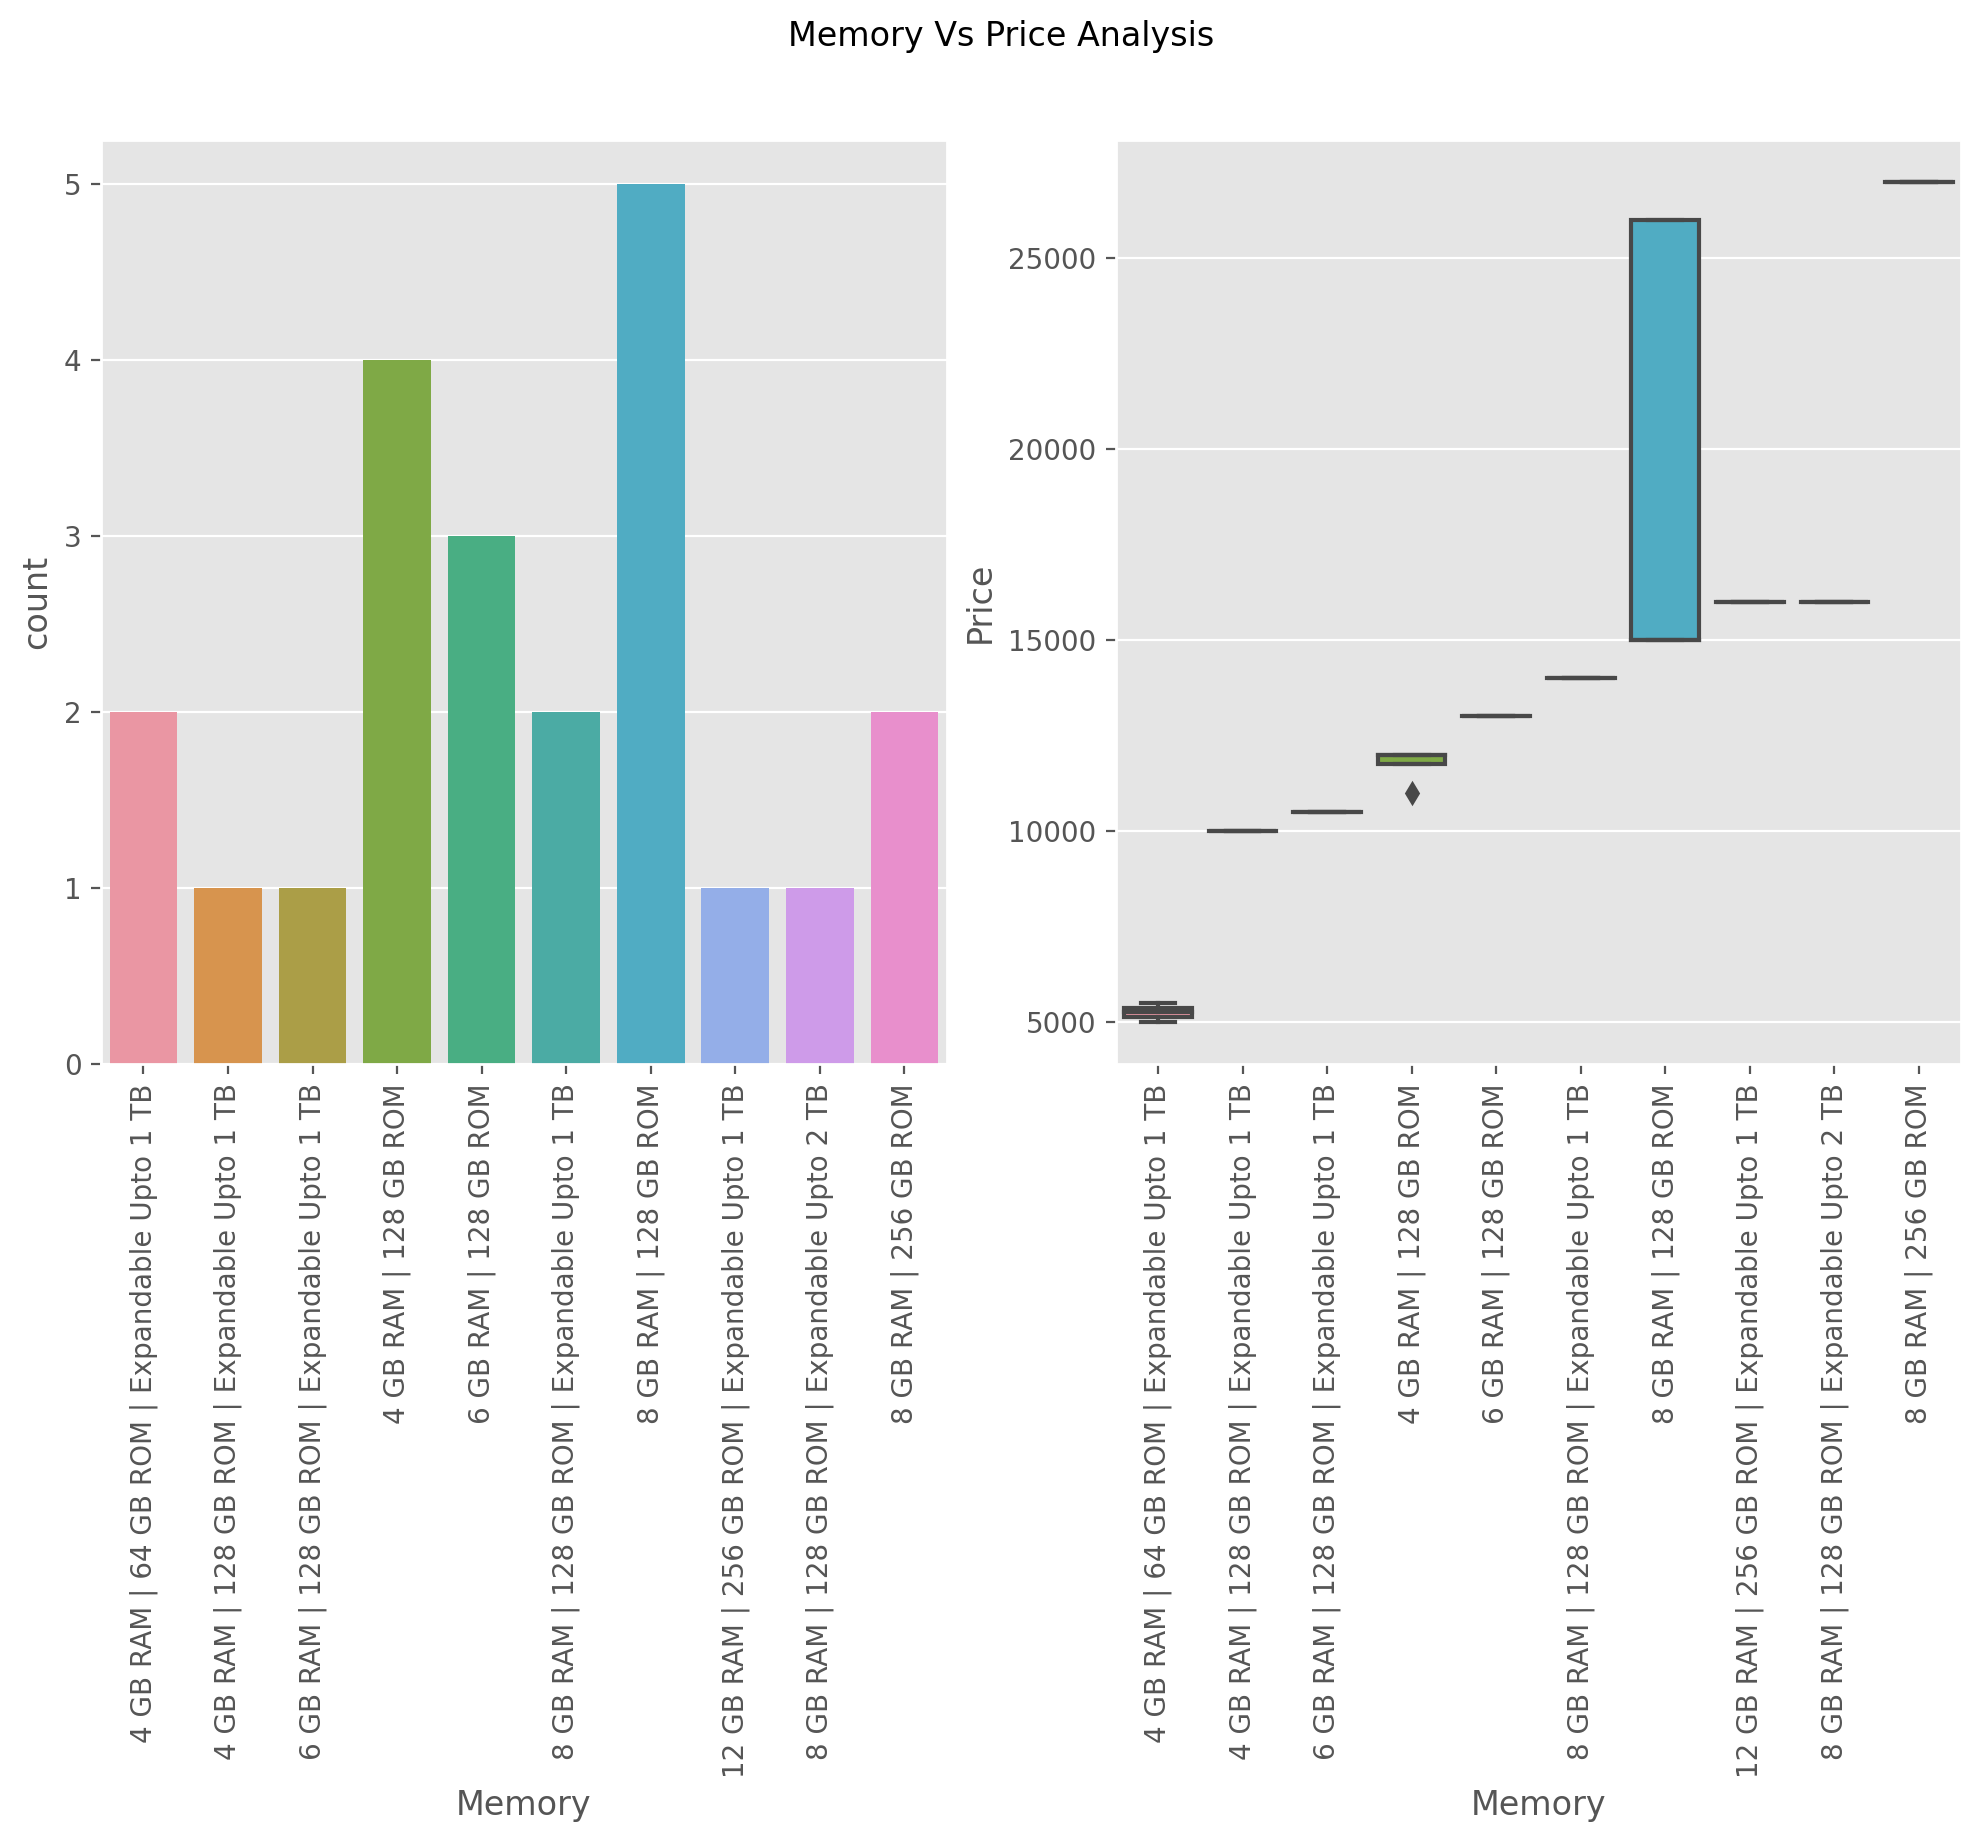

In [37]:
plt.figure(figsize=(12,6), dpi=200)
plt.suptitle('Memory Vs Price Analysis')
plt.subplot(1,2,1)
sns.countplot(x='Memory', data=df)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(x='Memory',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

**Observation on Memory Vs Price Analysis:**
- The analysis reveals a discernible relationship between the price of a phone and its memory type.
- There is notable price variation observed depending on the type of memory used in the phone.
  
This observation suggests that memory type could be a significant factor influencing the pricing of phones. Further investigation into specific memory types and their impact on pricing may provide valuable insights for market analysis or pricing strategy development.

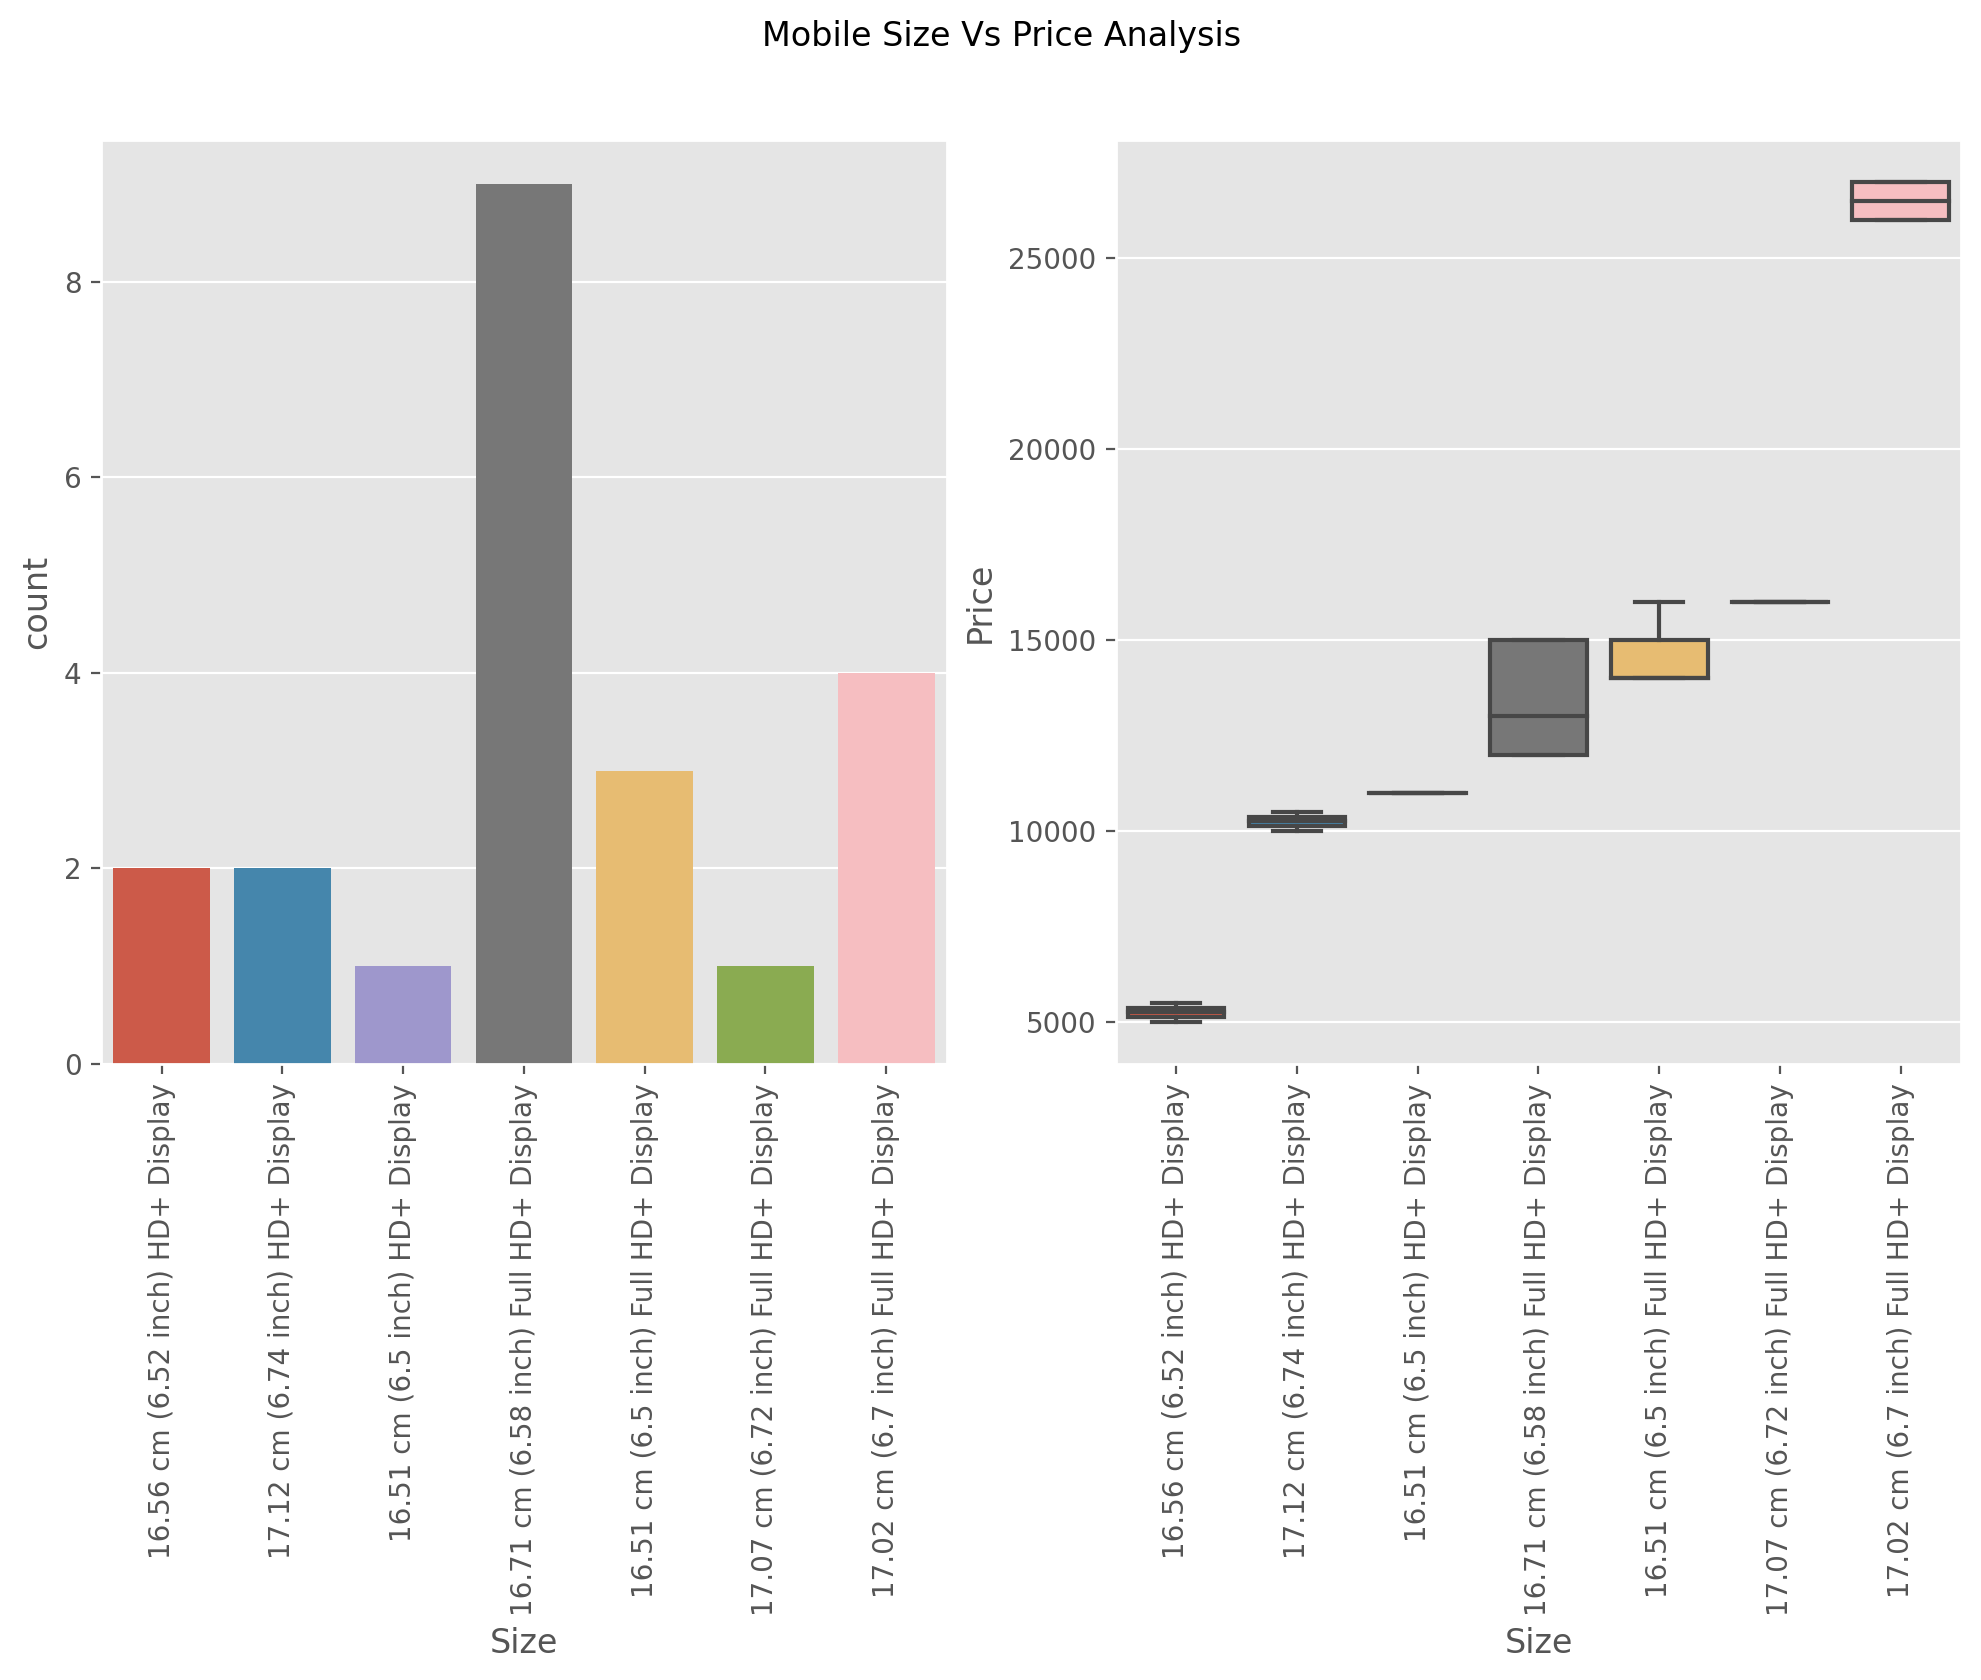

In [38]:
plt.figure(figsize=(12,6), dpi=200)
plt.suptitle('Mobile Size Vs Price Analysis')
plt.subplot(1,2,1)
sns.countplot(x='Size', data=df)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(x='Size',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

**Observation on Mobile Size Vs Price Analysis:**
- The analysis indicates a clear influence of mobile size on the price of phones.
- There is a positive correlation observed between the size of the phone and its price, suggesting that larger phones tend to have higher prices.
- This relationship between size and price could potentially be utilized in predicting the price of a phone, as larger sizes may command higher prices in the market.
  
This observation highlights the importance of considering mobile size as a factor in pricing strategies and market analysis. Further exploration into the specific size ranges and their corresponding price points may provide additional insights for pricing decisions.

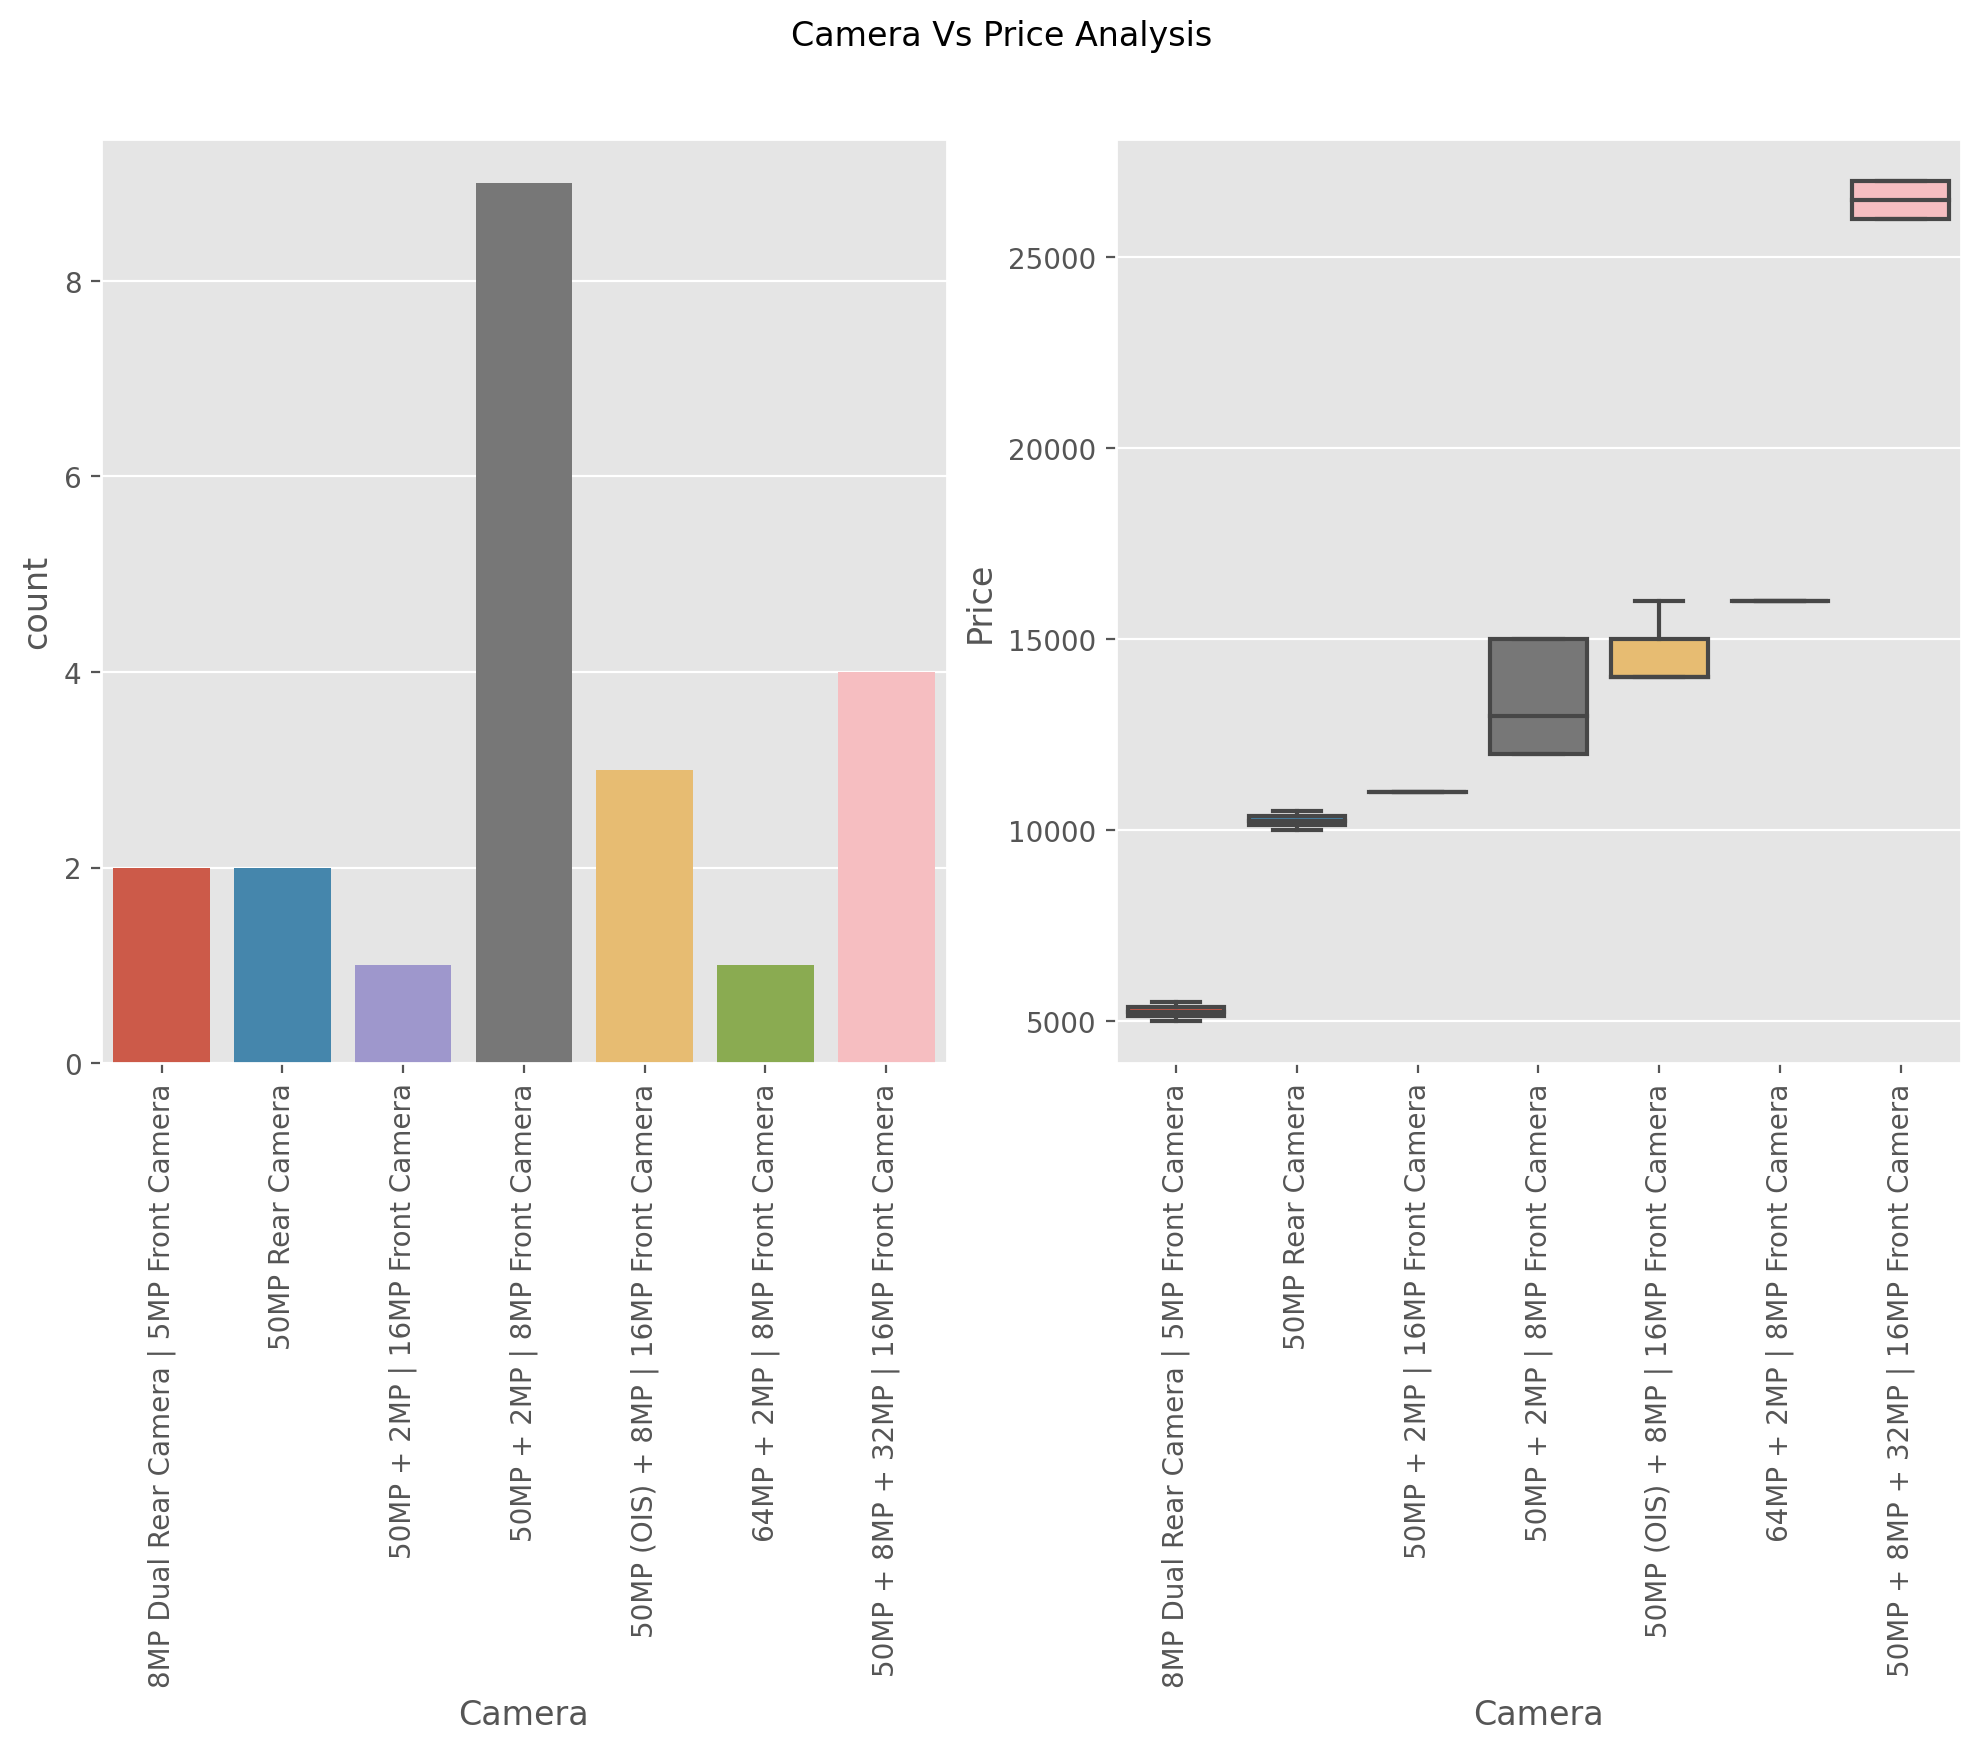

In [39]:
plt.figure(figsize=(12,6), dpi=200)
plt.suptitle('Camera Vs Price Analysis')
plt.subplot(1,2,1)
sns.countplot(x='Camera', data=df)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(x='Camera',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

**Observation on Camera Vs Price Analysis:**
- The analysis indicates that the price of a phone varies significantly based on the type and quality of the camera.
- Phones offering higher megapixels (MP) and other advanced camera features tend to command higher prices in the market.
- There is a positive correlation observed between the camera specifications and the price of the phone, suggesting that better camera technology contributes to higher pricing.
  
This observation underscores the importance of camera quality as a significant factor influencing consumer purchasing decisions and pricing strategies in the mobile phone market. Manufacturers may leverage advancements in camera technology to justify premium pricing and differentiate their products in the competitive landscape.

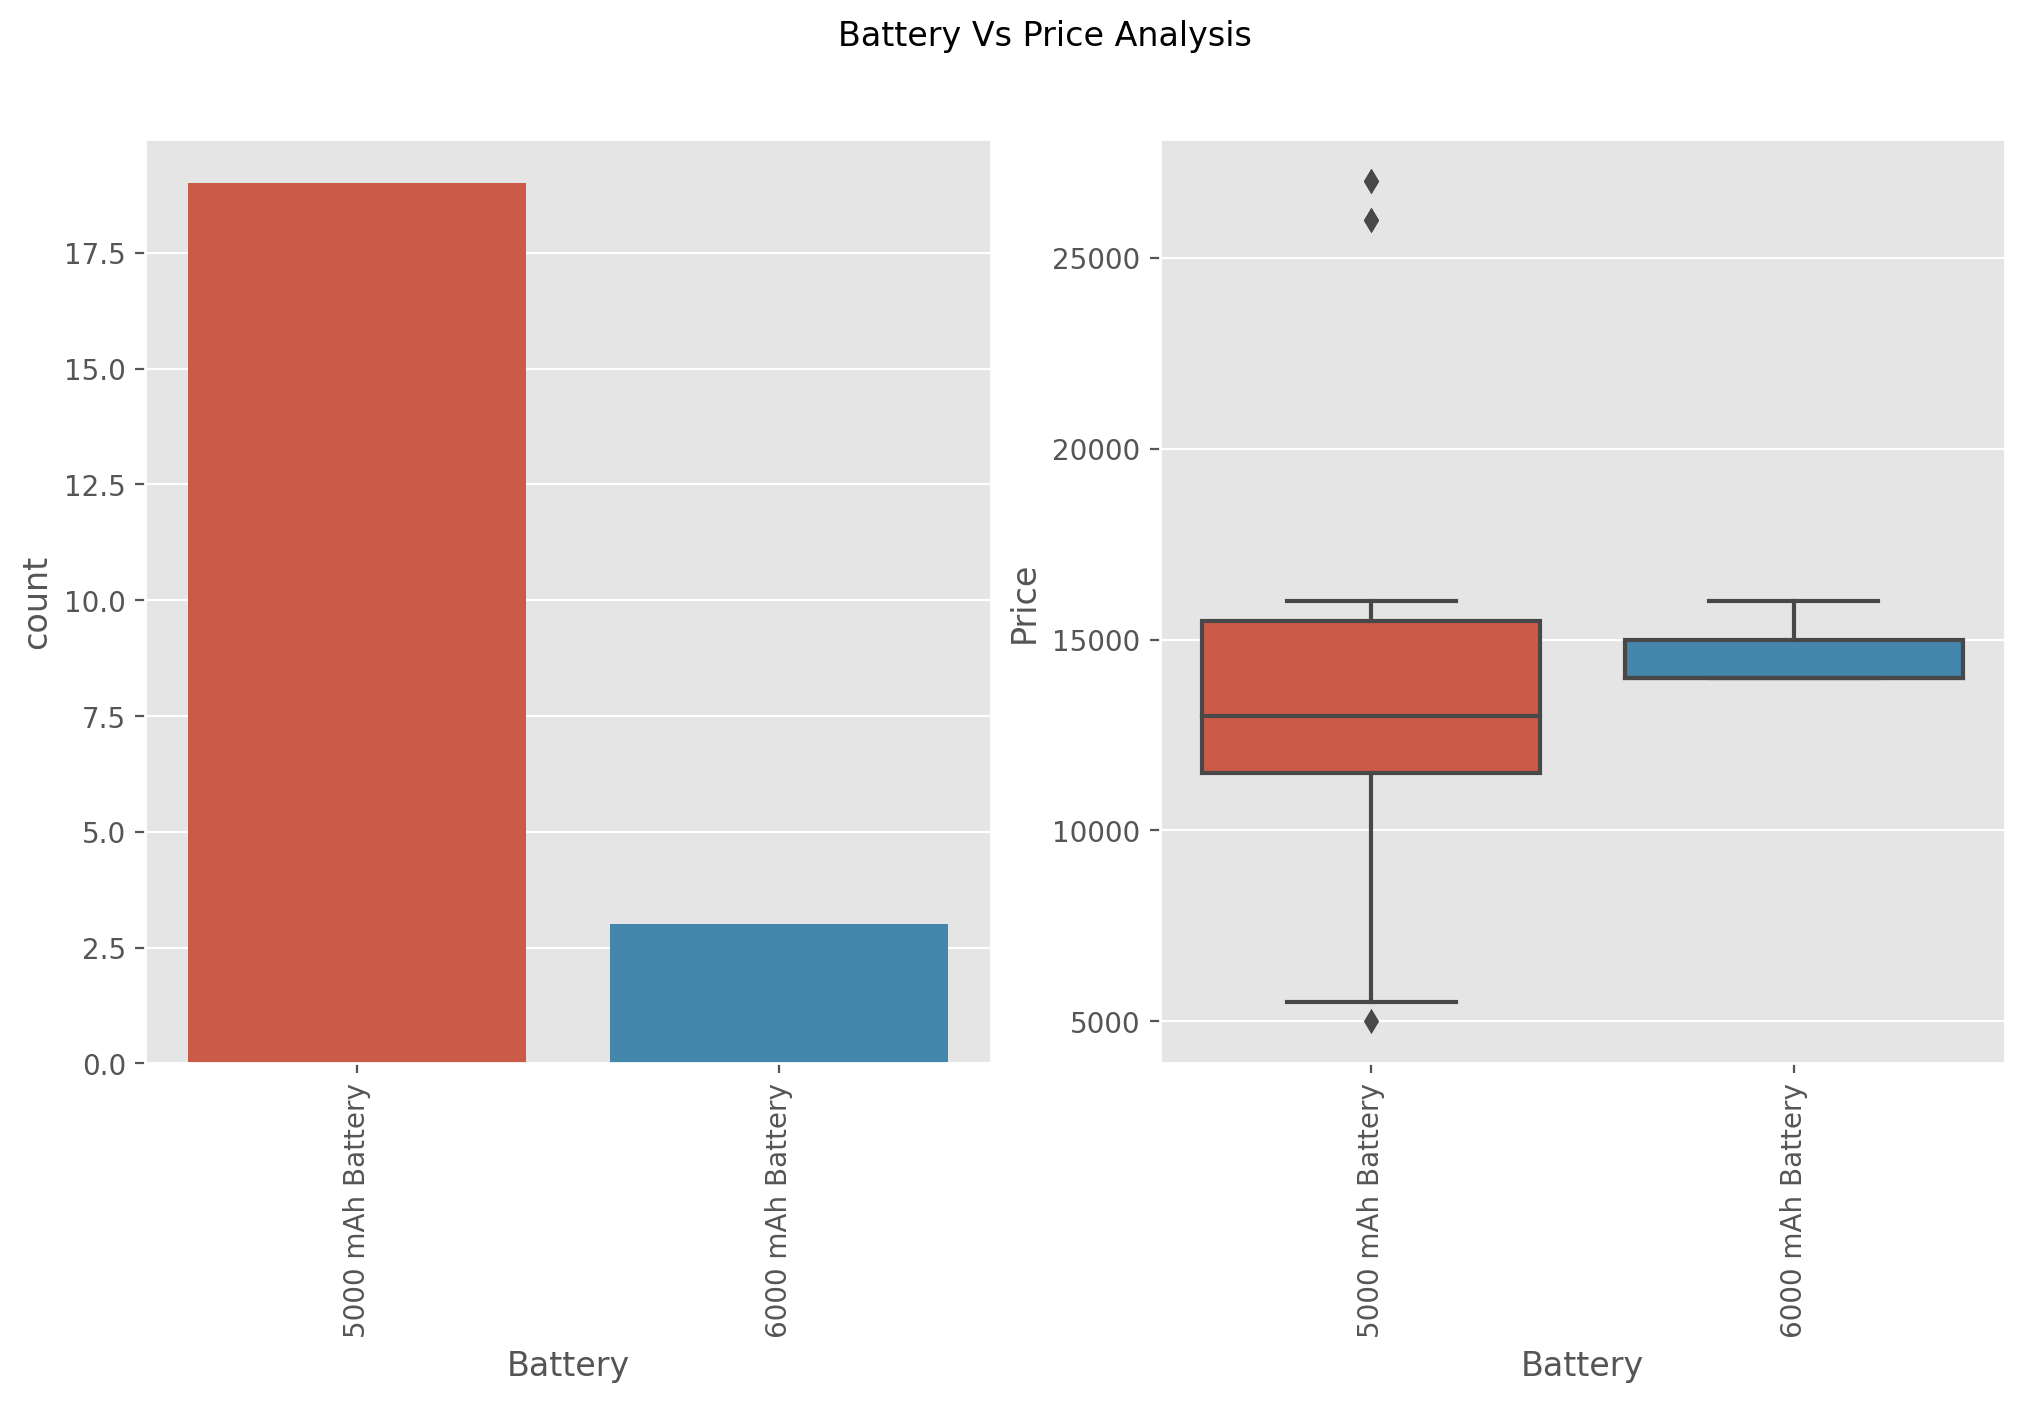

In [40]:
plt.figure(figsize=(12,6), dpi=200)
plt.suptitle('Battery Vs Price Analysis')
plt.subplot(1,2,1)
sns.countplot(x='Battery', data=df)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(x='Battery',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

**Observation on Battery Vs Price Analysis:**
- The analysis suggests that there isn't a direct linear relationship between the capacity of the battery and the price of the phone.
- However, there are some discernible patterns observed:
  - Phones with higher battery capacities tend to command higher prices overall.
  - Both higher and lower prices can be associated with lower battery capacities, indicating a more complex relationship.
- Two major battery capacities, namely 5000 mAh and 6000 mAh, are predominant in the dataset.
  
This observation implies that while battery capacity may influence pricing to some extent, other factors likely contribute to the overall pricing strategy of phones. Further investigation into the specific features and market dynamics surrounding different battery capacities could provide deeper insights into their impact on pricing.

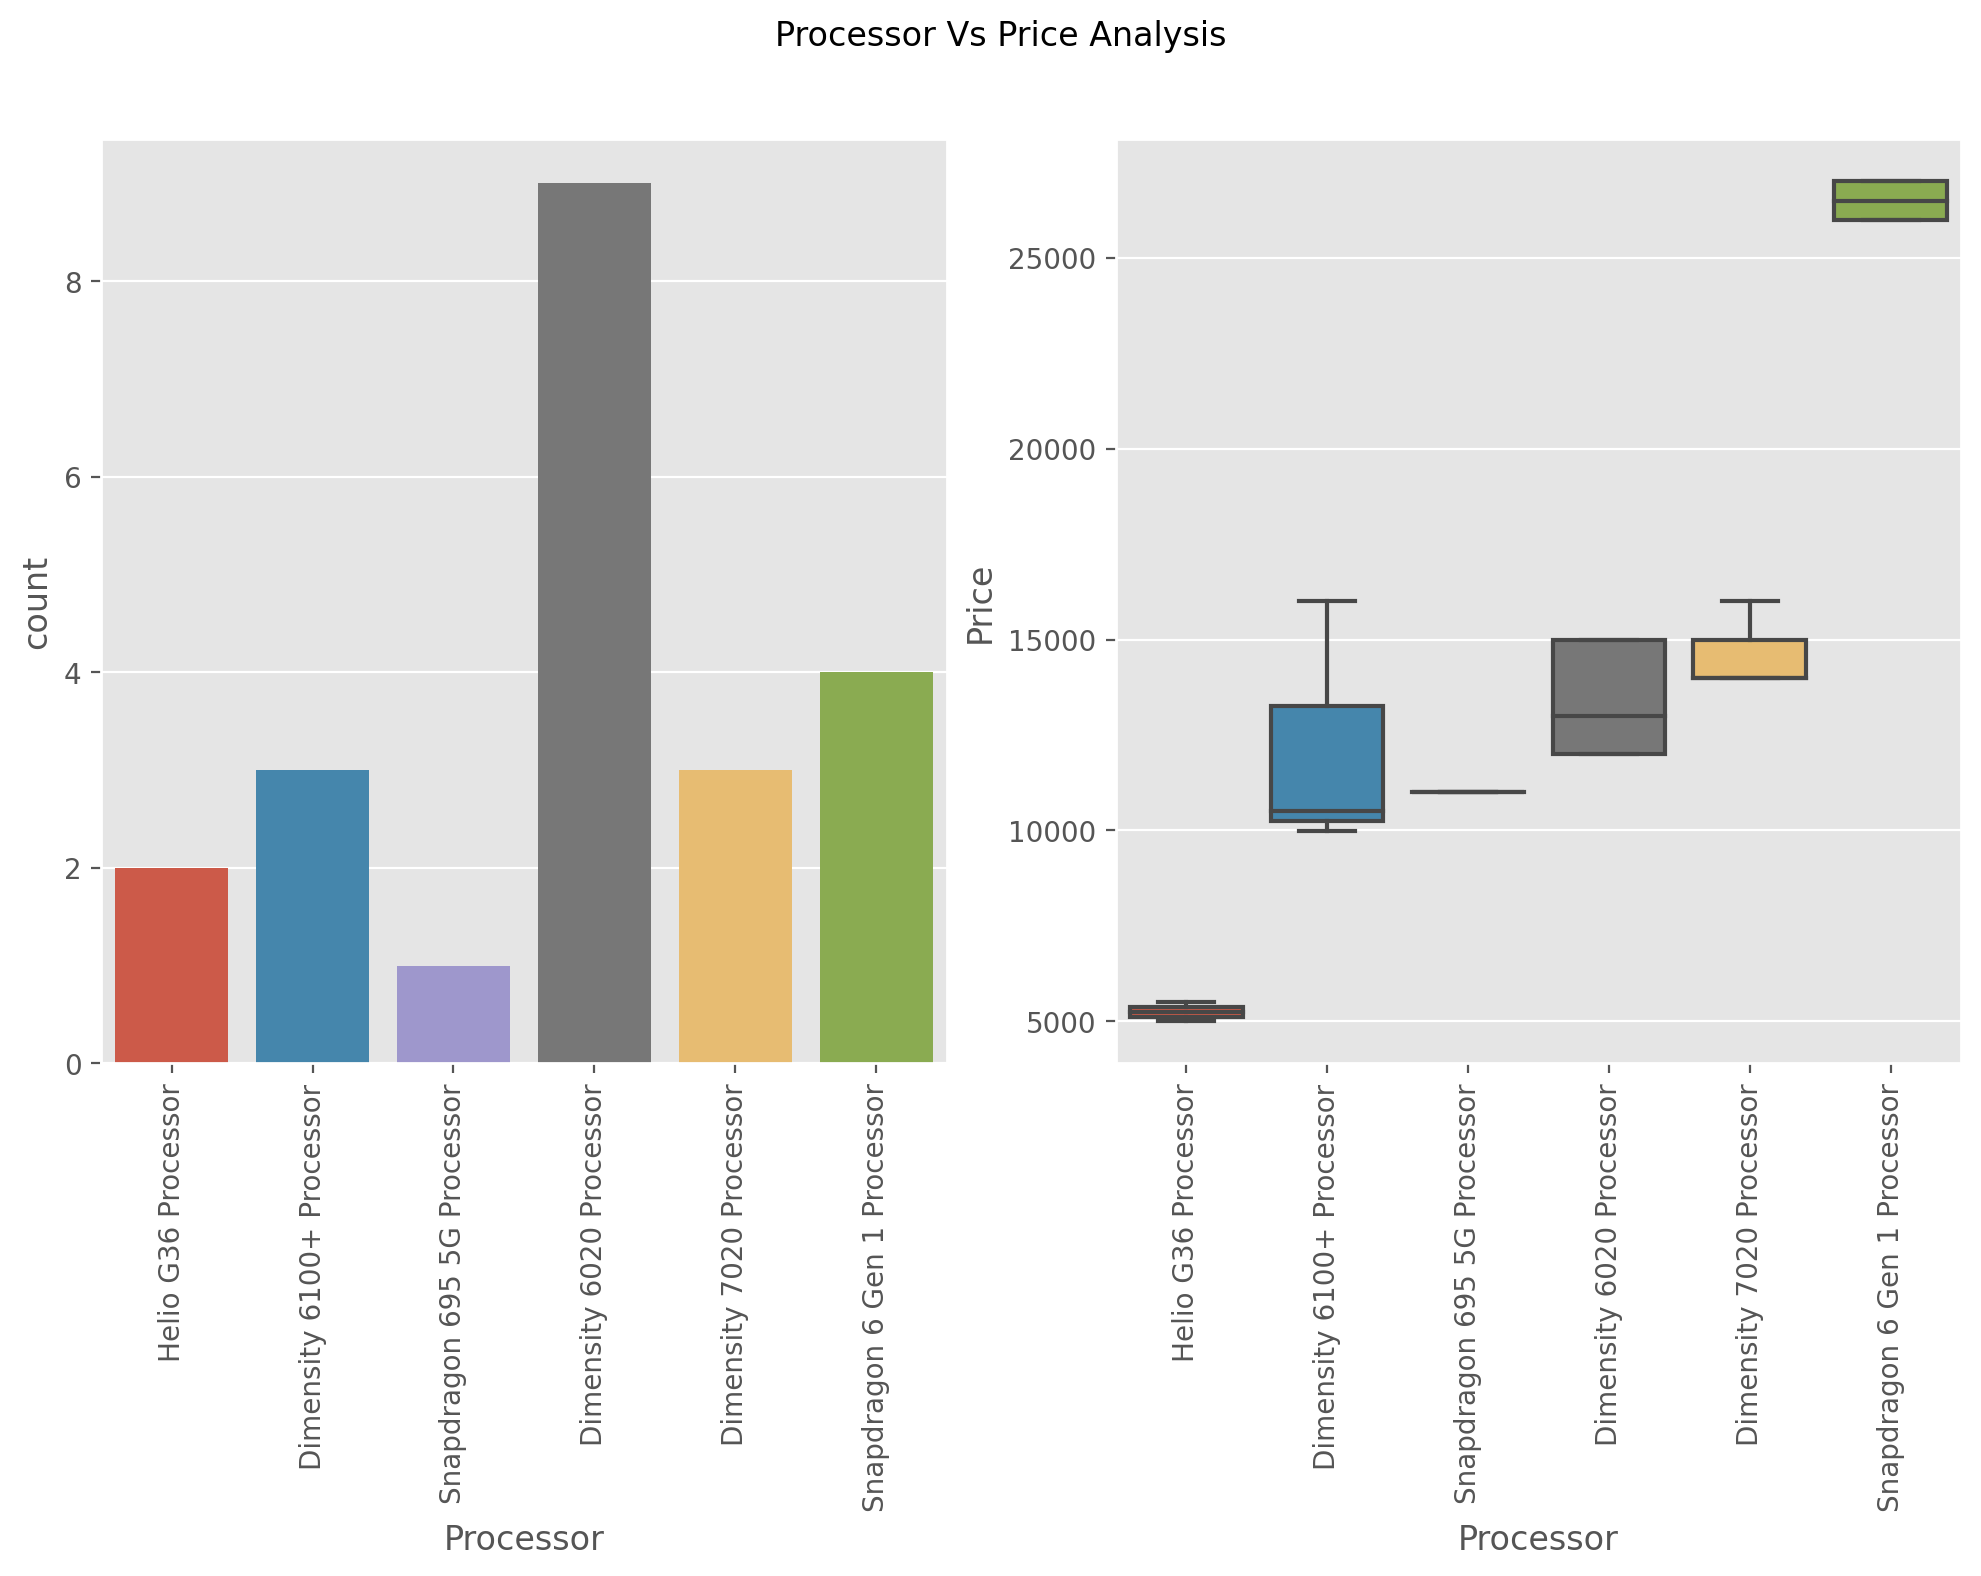

In [41]:
plt.figure(figsize=(12,6), dpi=200)
plt.suptitle('Processor Vs Price Analysis')
plt.subplot(1,2,1)
sns.countplot(x='Processor', data=df)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(x='Processor',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

**Observation on Processor Vs Price Analysis:**
- The analysis indicates a noticeable influence of the processor on the price of a device.
- Devices equipped with advanced and higher-performing processors tend to have higher prices.
- There is a positive correlation observed between the quality or performance level of the processor and the price of the device, suggesting that more powerful processors command premium pricing.
  
This observation underscores the importance of processor specifications as a significant determinant of pricing in the mobile device market. Manufacturers may leverage advancements in processor technology to justify higher price points and differentiate their products in a competitive landscape driven by performance and innovation.

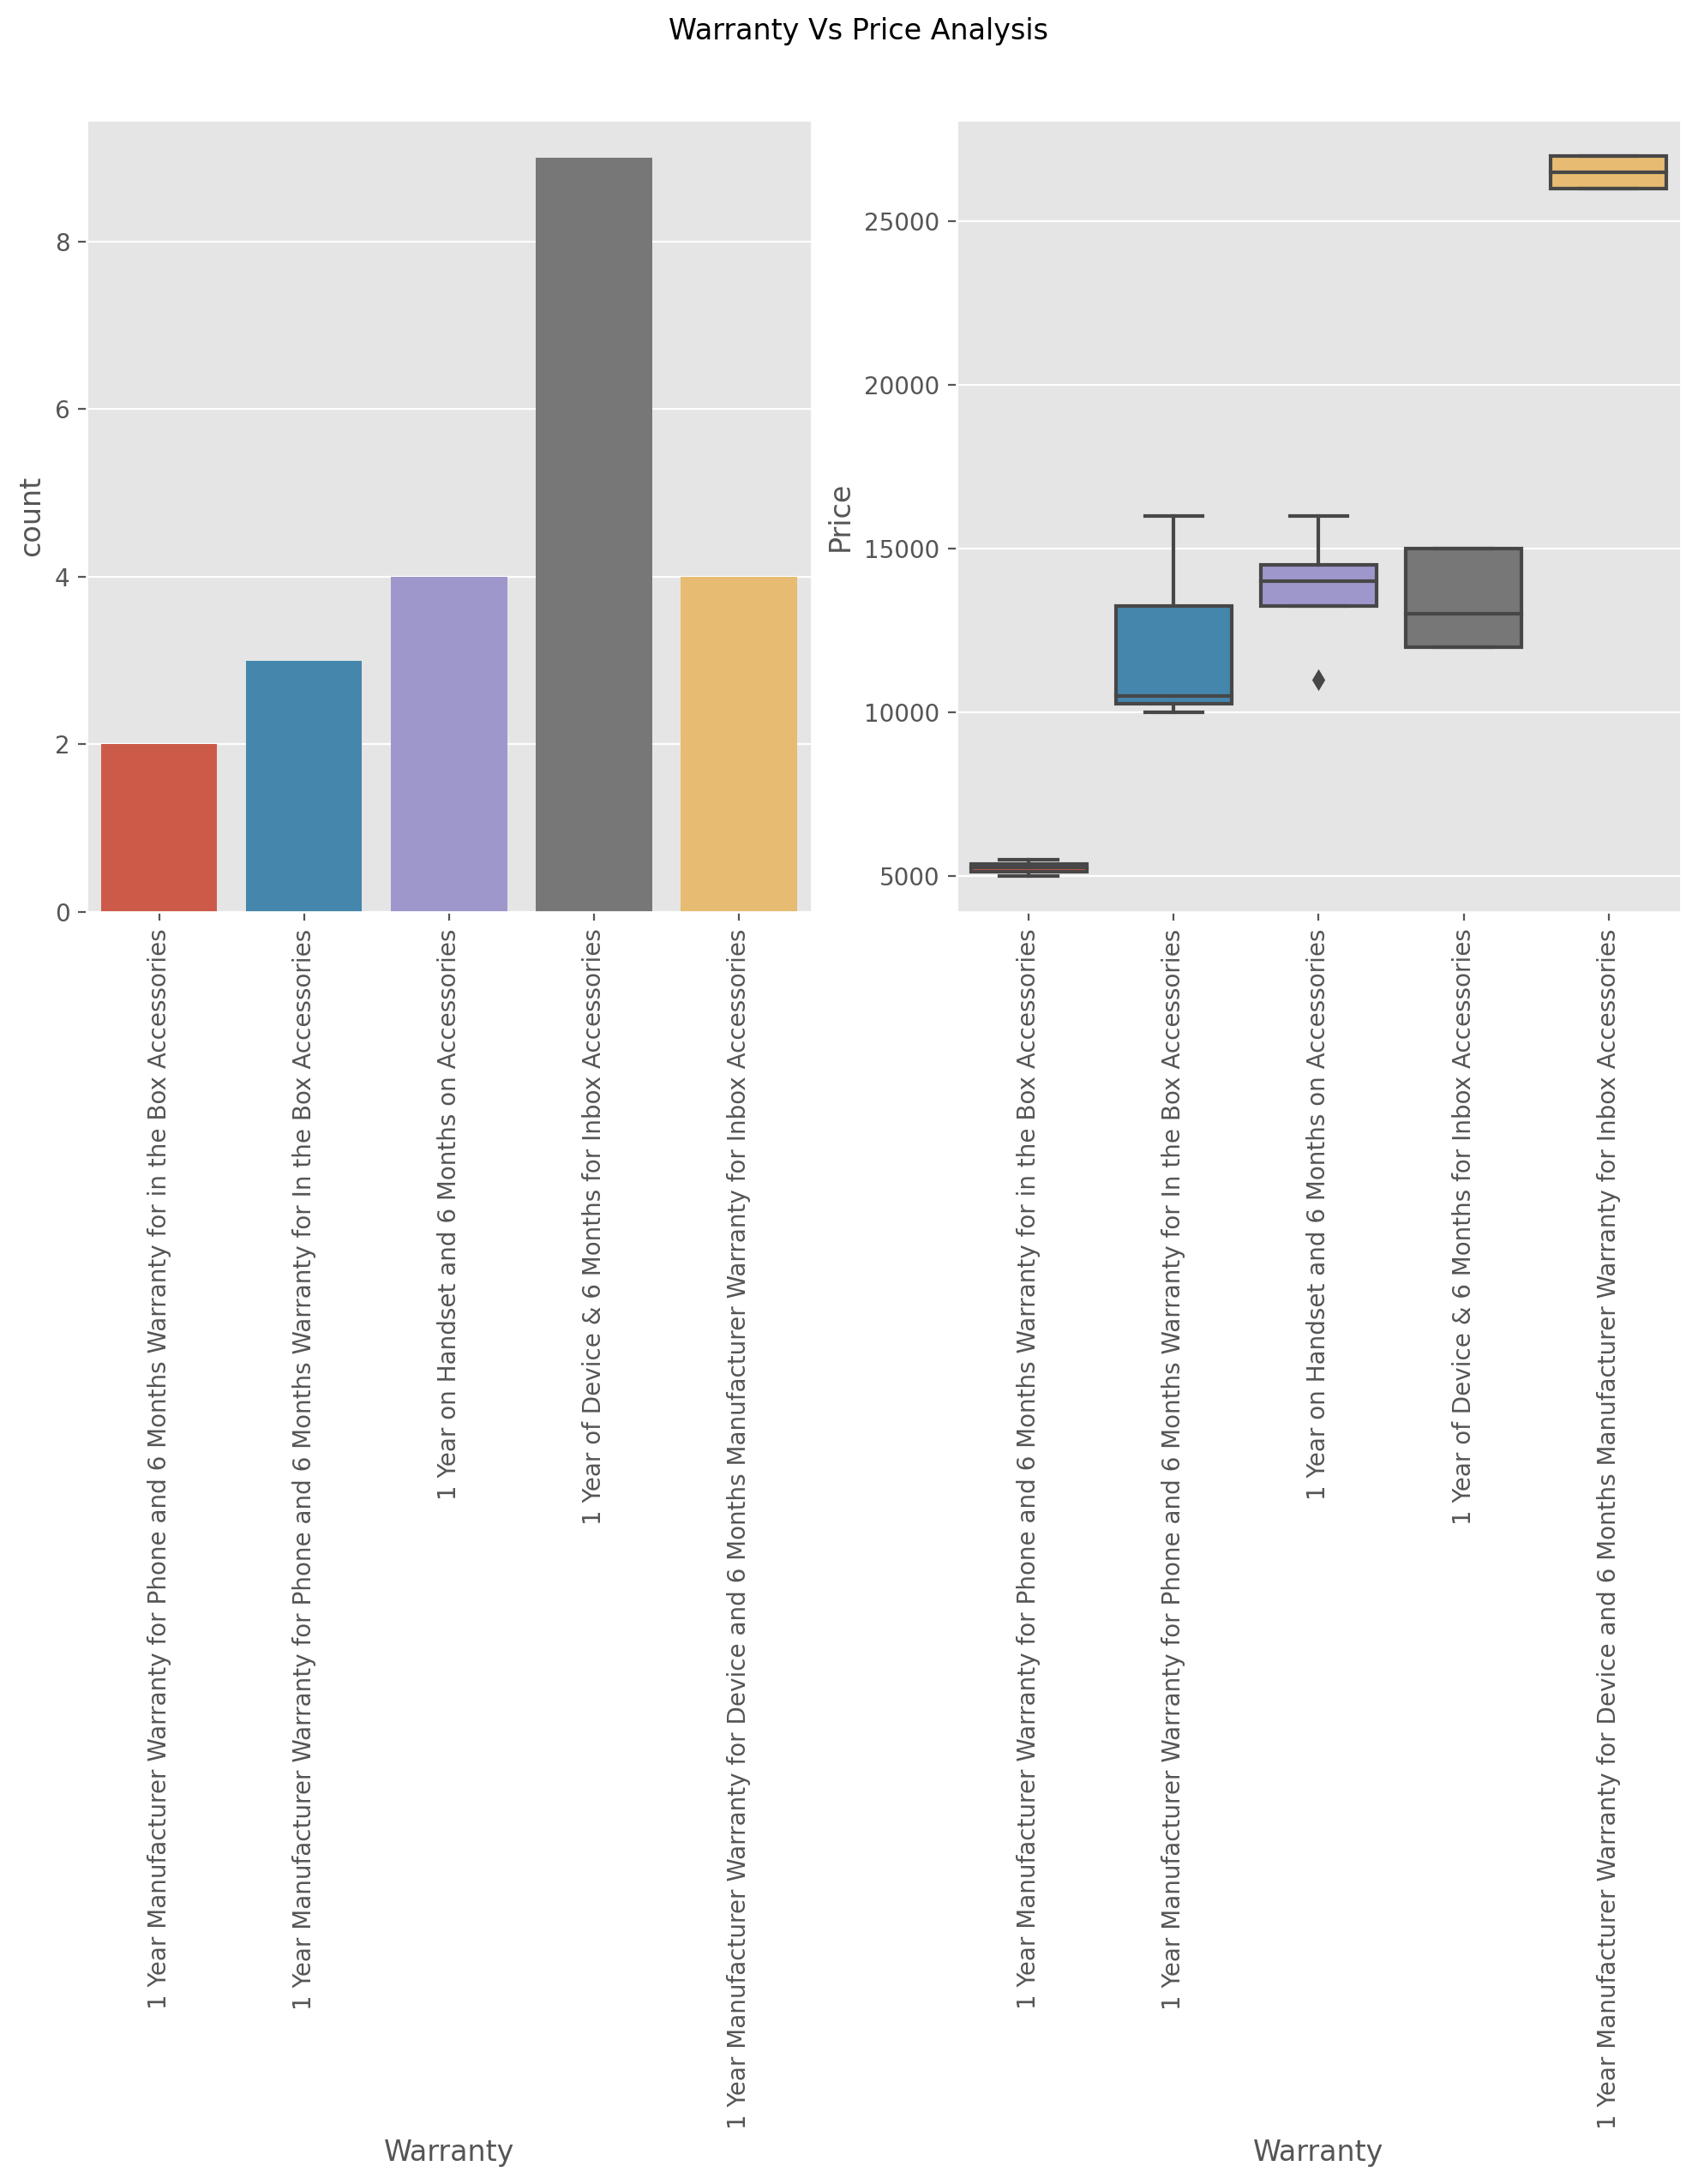

In [42]:
plt.figure(figsize=(12,6), dpi=200)
plt.suptitle('Warranty Vs Price Analysis')
plt.subplot(1,2,1)
sns.countplot(x='Warranty', data=df)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(x='Warranty',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

**Observation on Warranty Vs Price Analysis:**
- The analysis reveals a relationship between the warranty period offered and the price of the device.
- Higher-priced devices typically come with longer or more comprehensive warranty coverage.
- There is a positive correlation observed between the price of the device and the warranty benefits, indicating that consumers paying a higher price tend to receive greater warranty benefits.
  
This observation highlights the strategic use of warranty offerings as a value-added feature to justify premium pricing in the mobile device market. Manufacturers may use extended warranty periods or additional coverage as incentives to attract consumers willing to invest in higher-priced devices.

---
---

### Summary of Project:

- This project combines web scraping and data analysis techniques to gather insights from mobile phone data sourced from the Flipkart website.
- The data collection phase involved scraping information about mobile phones from Flipkart's web pages.
- Data cleaning procedures were applied to handle missing values and remove duplicated entries, ensuring the integrity of the dataset.
- The scraped data was structured and stored in a Pandas DataFrame, enabling further analysis and exploration.

**Key Findings from Exploratory Data Analysis (EDA):**
1. **Memory vs Price Analysis:**
   - A discernible relationship exists between the price of a phone and its memory type.
   - Price variation is observed based on the type of memory used in the phone.

2. **Mobile Size vs Price Analysis:**
   - Mobile size influences the price of phones.
   - Larger phones tend to command higher prices, suggesting a positive correlation between size and price.
   - This relationship could potentially aid in predicting phone prices.

3. **Camera vs Price Analysis:**
   - The quality and type of camera significantly affect the price of a phone.
   - Phones with higher megapixels and advanced camera features tend to have higher prices.
   - Better camera technology correlates with higher pricing.

4. **Battery vs Price Analysis:**
   - While no direct linear relationship exists between battery capacity and price, patterns are discernible.
   - Phones with higher battery capacities generally have higher prices.
   - Both higher and lower prices can be associated with lower battery capacities, indicating a more complex relationship.

5. **Processor vs Price Analysis:**
   - The processor plays a significant role in determining the price of a device.
   - Phones equipped with advanced and high-performance processors command higher prices.
   - A positive correlation exists between processor quality/performance and device price.

6. **Warranty vs Price Analysis:**
   - The warranty period offered correlates with the price of the device.
   - Higher-priced devices often come with longer or more comprehensive warranty coverage.
   - Consumers paying higher prices tend to receive greater warranty benefits.

Overall, the project demonstrates how web scraping and data analysis can provide valuable insights into pricing dynamics and consumer preferences in the mobile phone market. These insights can inform marketing strategies, product development, and pricing decisions for mobile phone manufacturers and retailers.